In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("FuelConsumption.csv")

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [7]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


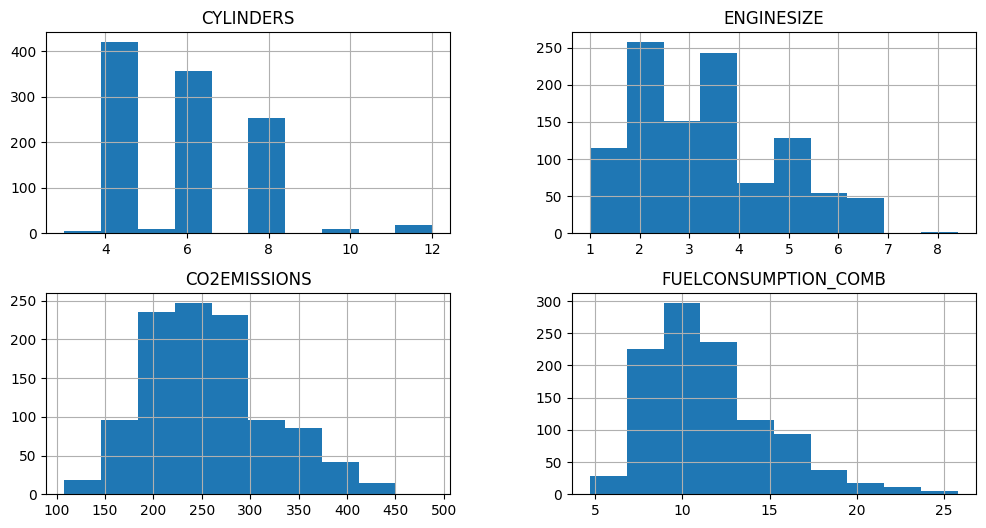

In [8]:
plt.rcParams['figure.figsize'] = (12,6)

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

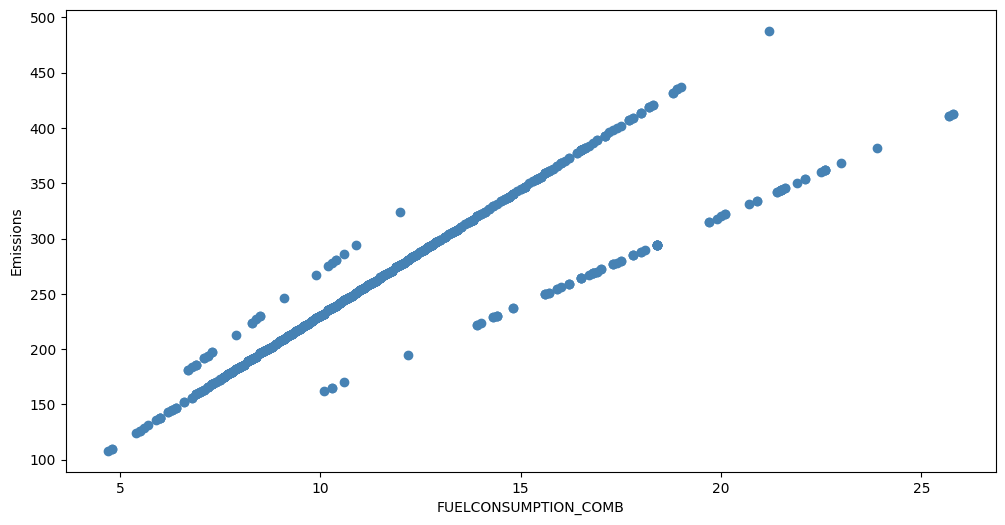

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emissions")
plt.show()

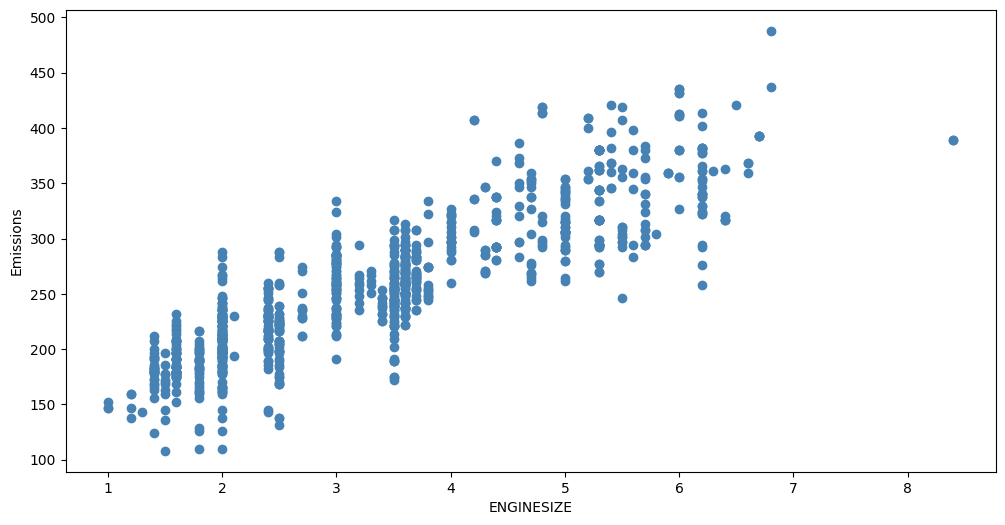

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

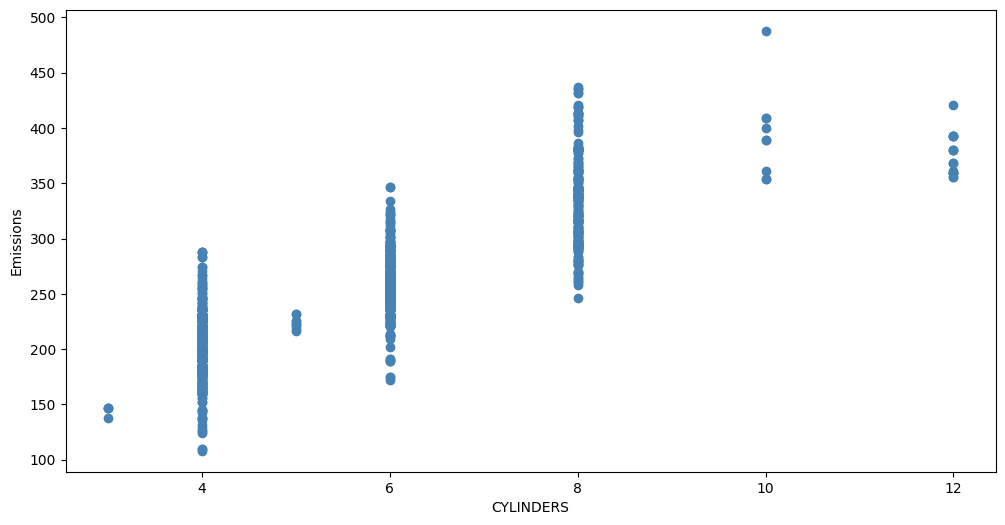

In [11]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("CYLINDERS")
plt.ylabel("Emissions")
plt.show()

In [12]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

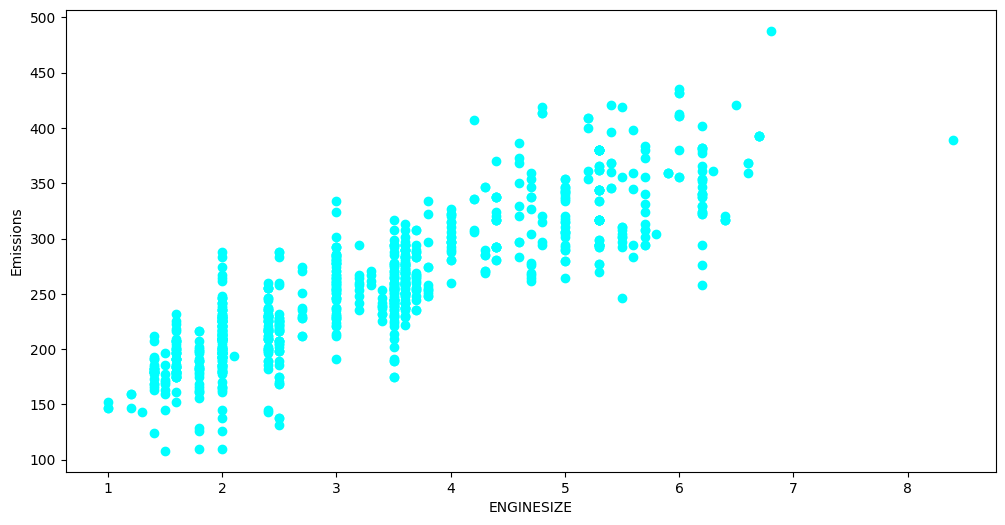

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="cyan")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

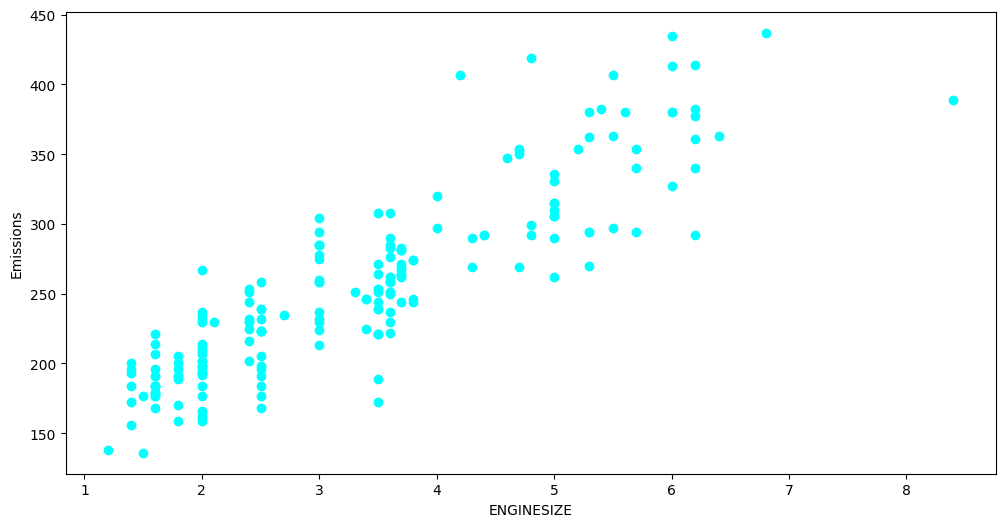

In [14]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color="cyan")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)


LinearRegression()

In [16]:
print(regr.coef_)
print(regr.intercept_)

[[38.87619292]]
[126.40480012]


In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [18]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.74
Residual sum of squares (MSE): 915.36
R2-score: 0.78


# FUELCONSUMPTION_COMB için:
Model oluşturma ve eğitme


In [19]:
from sklearn.metrics import r2_score

# 'test' veri setindeki 'FUELCONSUMPTION_COMB' sütununu Numpy dizisine dönüştürme ve test_x'e atama işlemi yaptık.
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
# # 'test' veri setindeki 'CO2EMISSIONS' sütununu Numpy dizisine dönüştürme ve test_y'ye atama işlemi yaptık.
test_y = np.asanyarray(test[['CO2EMISSIONS']])
# 'regr' adındaki modeli kullanarak 'test_x' üzerinde tahmin yapma ve sonucu 'test_y_' değişkenine atama yaptık.
test_y_ = regr.predict(test_x)

In [20]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 316.84
Residual sum of squares (MSE): 107167.14
R2-score: -24.40


# Yeni Oluşturma

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
X = df[['FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']

In [23]:
#Hem eğitim hem test veri setlerini oluşturma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#Multiple linear regression modelini oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Test veri seti üzerinde modelin performansını değerlendirme
score =model.score(X_test,y_test)
print(f'Model Score: {score}')

Model Score: 0.8071474868274242


0.80 gibi bir R-kare (Model Score) değeri genellikle makul kabul edilir. Ancak, bu değer modelin başarısını tam olarak açıklamayabilir. Başka durumlar ve problem alanları için daha yüksek veya daha düşük bir R-kare değeri daha iyi olabilir.

In [26]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [27]:
print(f'MSE (Ortalama Kare Hata): {mse}')
print(f'R-Kare (Varyans Açıklama): {r2}')

MSE (Ortalama Kare Hata): 797.4346310097205
R-Kare (Varyans Açıklama): 0.8071474868274242


In [28]:
fuel_consumption = 10.5  # Örnek bir yakıt tüketimi değeri yapmak için:
new_data = [[fuel_consumption]]
predicted_emission = model.predict(new_data)
print(f'Tahmin Edilen Emisyon: {predicted_emission[0]}')

Tahmin Edilen Emisyon: 239.002484382476


c:\Users\sevgi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
# Aynısını randomForestRegressor ile yaptık 

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [31]:
X = df[['FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS']

# Eğitim ve test veri setlerini oluşturma
# random_state=42 gibi belirli bir sayı seçmek genellikle tercih edilen bir uygulamadır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor modelini oluşturma ve eğitme
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)

# Test veri seti üzerinde modelin performansını değerlendirme
y_pred = forest_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE (Ortalama Mutlak Hata): {mae}')
print(f'MSE (Ortalama Kare Hata): {mse}')
print(f'R-Kare (Varyans Açıklama): {r2}')

MAE (Ortalama Mutlak Hata): 8.99771923135127
MSE (Ortalama Kare Hata): 507.99906038302476
R-Kare (Varyans Açıklama): 0.8771449198787316


 (MAE), modelinizin tahminleri ile gerçek değerler arasındaki mutlak farkların ortalaması. Yani, burada elde ettiğiniz 8.9895 değeri, test veri setinizdeki CO2 emisyonu değerleri için modelinizin ortalama olarak yaklaşık 8.99 birimlik hata yaptığını gösterir. 

 Bu durumda, ortalama mutlak hata değeri düşük bir değerdir, bu da modelinizin tahminlerinin genellikle gerçek değerlere yakın olduğunu gösterir.

MSE, Bu değer, modelin tahminlerinin gerçek değerlerden ne kadar uzaklıkta olduğunu ölçer ve büyük hataların daha fazla vurgulanmasına neden olabilir.

Evet, 498 büyük bir hata değeri olarak yorumlanabilir.


0 ile 1 arasında değer alır ve daha yüksek bir R-Kare değeri, modelin veri setinin varyansının daha iyi açıklandığı anlamına gelir.

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

In [33]:
# GradientBoostingRegressor modelini oluşturma ve eğitme
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Test veri seti üzerinde modelin performansını değerlendirme
y_pred = gb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE (Ortalama Mutlak Hata): {mae}')
print(f'MSE (Ortalama Kare Hata): {mse}')
print(f'R-Kare (Varyans Açıklama): {r2}')

MAE (Ortalama Mutlak Hata): 8.881132982515247
MSE (Ortalama Kare Hata): 479.4681902863111
R-Kare (Varyans Açıklama): 0.8840448584908589


In [34]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


# Simple regression formula 
y ̂ = θ0 + θ1 x1 
y = a + b * x

y = m0 ENGINESIZE +B0 + m1 CYLINDERS +b1 ...+ mn
y= regr.coef_ * x + intercept_

CO2EMISSIONS = regr.coef_ * ENGINESIZE + intercept_

COEMISSIONS = 125 + 7.5 * ENGINESIZE + 15 * CYLINDERS + ...


y= 150
196-150= 46 residual error 

Calculate 'MSE' value for model accuracy

How to estimate multiple linear regression parametres?
- How to estimate beta?
 - Ordinary Least Squares:
  - Takes long time for large datasets (10K+ rows)
 - An optization algorithm
  - Gradient Descent

In [35]:
cdf.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'], dtype='object')

In [36]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [37]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

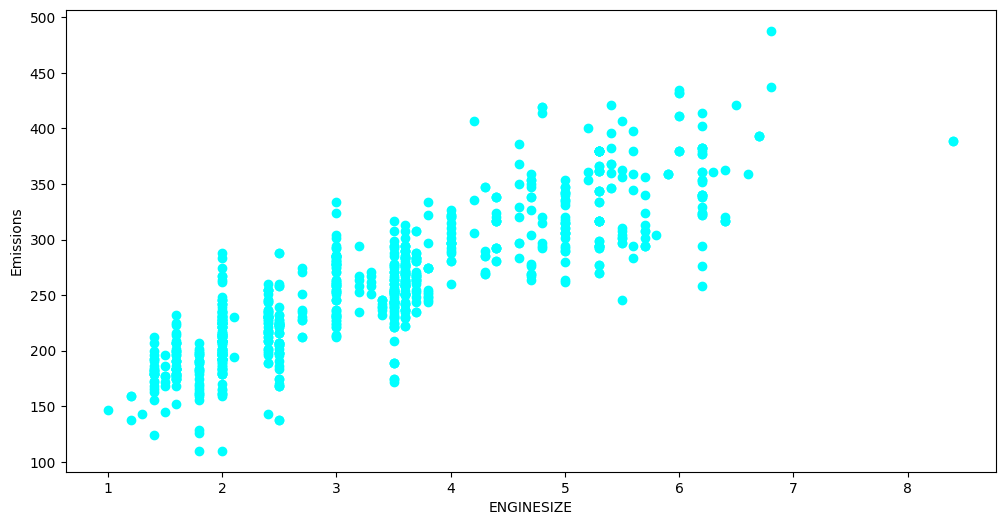

In [38]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="cyan")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [43]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
x=np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(x,y)

LinearRegression()

In [44]:
print('Coefficient: ',regr.coef_)

Coefficient:  [[11.40246982  7.1878417   9.23921885]]


In [46]:
# Prediction
y_hat=regr.predict(np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]))
x=np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y=np.asanyarray(test[['CO2EMISSIONS']])

print("MSE: %.2f"% np.mean((y_hat-y)**2))
print('Variance score: %.2f'%regr.score(x,y))

MSE: 528.54
Variance score: 0.89


In [ ]:
# TODO 
# How to use Mean Squared Error (MSE) in multiple regressions

# Practice 

In [ ]:
# Practice
# use a multiple linear regression with the same data, use  FUELCONSUMPTION_CITY AND FUELCONSUMPTION_HWY İNSTEAD OF	FUELCONSUMPTION_COMB	FUELCONSUMPTION_COMB_MPG	CO2EMISSIONS
# Does it result with better accuracy

In [47]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [48]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


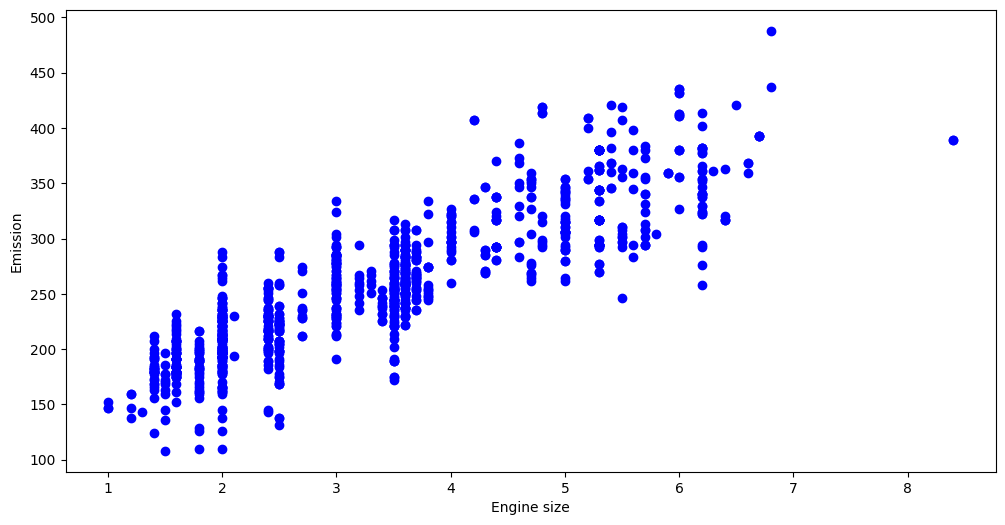

In [49]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [50]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [51]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(x, y)


LinearRegression()

In [52]:
print('Coefficients:', regr.coef_)

Coefficients: [[11.04289264  6.79740243  6.44718356  2.69707231]]


In [54]:
y_hat = regr.predict(np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]))
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y)) 

Mean Squared Error (MSE) : 492.68
Variance score: 0.88
